In [1]:
import numpy as np
import os
import matplotlib
from matplotlib.pyplot import *
from scipy.integrate import odeint
from scipy.stats import norm
from math import * 
import sys
from numpy.fft import *
import warnings
from scipy.optimize import fsolve
warnings.filterwarnings('ignore')

%pylab inline
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('mycmap', [(0, 'white'),(0.1, 'blue'),
                                                    (0.3,'green'),(0.4, 'yellow'),
                                                    (0.6,'brown'),(1.0,'white')],N=256)

cmapnew = LinearSegmentedColormap.from_list('mycmap', [(0, 'white'),(0.25, 'blue'),
                                                    (0.5,'green'),(0.75, 'yellow'),
                                                    (1.0,'brown')],N=256)


Populating the interactive namespace from numpy and matplotlib


Extracted T2 :  343.43098605226913
Extracted p :  1.0075923116701309


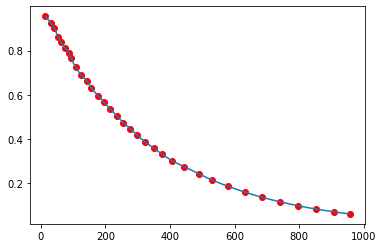

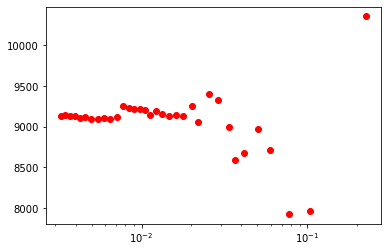

In [33]:
# the n = 1 case
from scipy.optimize import curve_fit
def myfunction(t, T2, p):
    power = (t*1.0/T2)**p
    return exp(-power);

myFile = np.genfromtxt('a.csv', delimiter=',');
t_data = myFile[:,0]*1e-6;
C_data = myFile[:,1]; 

T2_guess = 300e-6; p_guess = 1;
params, _ = curve_fit(myfunction, t_data, C_data, p0=(T2_guess, p_guess))
T2_fit = params[0]; p_fit = params[1]

print('Extracted T2 : ', T2_fit/1e-6);
print('Extracted p : ', p_fit);

plot(t_data/1e-6, C_data, 'ro');
#plot(t_data/1e-6, myfunction(t_data, T2_fit, p_fit), 'b.');

from scipy.interpolate import interp1d

t_new = linspace(min(t_data), max(t_data), 1000);
f = interp1d(t_data, C_data, kind = 'cubic');
C_new = f(t_new)
plot(t_new/1e-6, C_new)

# t_new and C_new now contains interpolated values
figure()
semilogx(pi/t_data/1e6, -pi*log(C_data)/t_data, 'ro');
S = -pi*log(C_new)/t_new;
#semilogx(pi/t_new/1e6, S, '*');


Extracted T2 :  1428.432458334732
Extracted p :  1.061460538316211


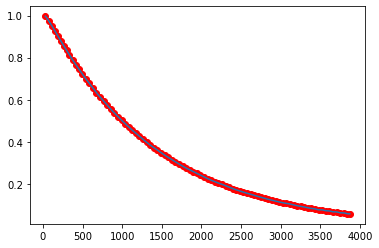

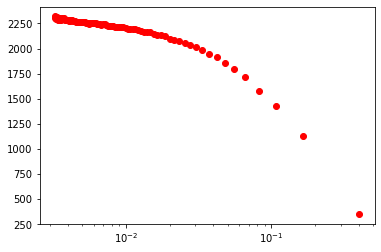

In [46]:
# the n = 4 case
from scipy.optimize import curve_fit
def myfunction(t, T2, p):
    power = (t*1.0/T2)**p
    return exp(-power);

myFile = np.genfromtxt('n6.csv', delimiter=',');
t_data = myFile[:,0]*1e-6;
C_data = myFile[:,1]; 

T2_guess = 300e-6; p_guess = 1;
params, _ = curve_fit(myfunction, t_data, C_data, p0=(T2_guess, p_guess))
T2_fit = params[0]; p_fit = params[1]

print('Extracted T2 : ', T2_fit/1e-6);
print('Extracted p : ', p_fit);

plot(t_data/1e-6, C_data, 'ro');
#plot(t_data/1e-6, myfunction(t_data, T2_fit, p_fit), 'b.');

from scipy.interpolate import interp1d

t_new = linspace(min(t_data), max(t_data), 1000);
f = interp1d(t_data, C_data, kind = 'cubic');
C_new = f(t_new)
plot(t_new/1e-6, C_new)

# t_new and C_new now contains interpolated values
figure()
semilogx(4*pi/t_data/1e6, -pi*log(C_data)/t_data, 'ro');
#semilogx(4*pi/t_new/1e6, -pi*log(C_new)/t_new, 'ro');

S = -pi*log(C_new)/t_new;



Populating the interactive namespace from numpy and matplotlib


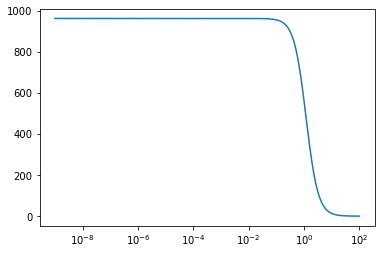

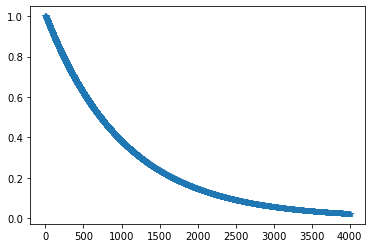

In [39]:
# fitting the noise spectrum function
%pylab inline
from numpy import exp, pi, cos, abs
from math import inf, pow
import scipy.integrate as integrate
import matplotlib.pyplot as pyplot

def calc_FF_v2(w, tau):
    tpi = 100e-9;  t1 = (tau + tpi)/2; 
    return ( abs( 1 + exp(1j*w*tau) - 2*exp(1j*w*t1)*cos(w*tpi/2) ) )**2; 

def noisefun(w, delta, tauc):
    S = delta**2*tauc*(1/(1 + (w*tauc)**2))/pi
    return S;

#w = logspace(0.0001e6, 50e6, 100);
w = logspace(-3, 8, 10000);

delta = .43e5;
delta = .6e5;
tauc = .84e-6;

# we will fit S with fig 1 later to extract a more accurate delta and tauc 

S = noisefun(w, delta, tauc);
semilogx(w/1e6, S);

trange = linspace(.1e-6, 4000e-6, 2000)
chi = zeros(len(trange));

i=0;
for tau in trange:
    FF = calc_FF_v2(w, tau);
    chi[i] = integrate.trapz(S*FF/w**2/pi, w); 
    i = i +1;

figure(); plot(trange/1e-6, exp(-chi), '*');

0.6283185307179586


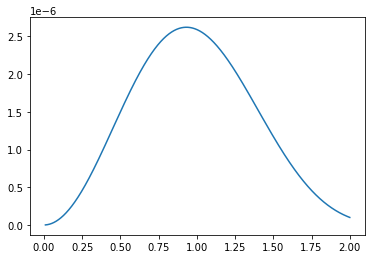

In [23]:
def calc_FF(tau):
    tpi = 100e-9;  t1 = (tau + tpi)/2; 
    w = linspace(0.01e6, 2e6, 5000); # rad/s
    return w, ( abs( 1 + exp(1j*w*tau) - 2*exp(1j*w*t1)*cos(w*tpi/2) ) )**2/ w**2/ tau; 

tau2 = 5e-6;
w2, FF2 = calc_FF(tau2)
plot(w2/1e6, FF2);

print(pi/tau2/1e6)

#integrate.trapz(FF2, w2)

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'C(t)')

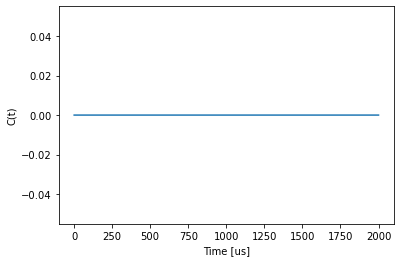

In [49]:
%pylab inline
from numpy import exp, pi, cos, abs
from math import inf, pow
import scipy.integrate as integrate
import matplotlib.pyplot as pyplot

def calc_FF(tau):
    tpi = 100e-9;  t1 = (tau + tpi)/2; 
    w = linspace(0.01e6, 20e6, 50000); # rad/s
    return w, ( abs( 1 + exp(1j*w*tau) - 2*exp(1j*w*t1)*cos(w*tpi/2) ) )**2/ w**2/ tau; 

trange = linspace(.1e-6, 2000e-6, 2000)
chi = zeros(len(trange));
T2 = 300e-6;

i=0;
for tau in trange:
    w, FF = calc_FF(tau);
    chi[i] = integrate.trapz(FF/T2/2., w); i = i +1; 

plot(trange/1e-6, exp(-chi));
xlabel('Time [us]'); ylabel('C(t)')

2.5445622919816433


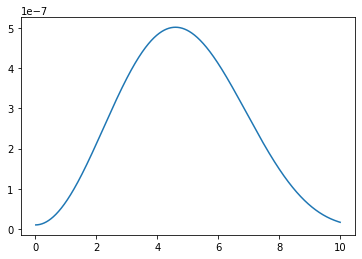

In [9]:
import scipy.integrate as integrate

def calc_FF(tau):
    tpi = 100e-9;  t1 = (tau + tpi)/2; 
    w = linspace(0.01e6, 10e6, 50000); # rad/s
    return w, ( abs( 1 + exp(1j*w*tau) - 2*exp(1j*w*t1)*cos(w*tpi/2) ) )**2/ w**2/tau; 

tau = 1e-6
w, FF = calc_FF(tau);
plot(w/1e6, FF);

print(integrate.trapz(FF, w))


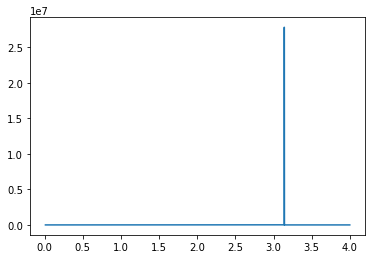

In [92]:
def calc_FF_natcom(tau):
    w = linspace(0.01e6, 4e6, 5000000); # rad/s
    n = 1;
    t = tau*n;
    return w, 8 * ((sin(w*t/2))**2 * (sin(w*t/4/n))**4 / ( cos(w*t/2/n)**2))/(w**2*t); 

w, FF = calc_FF_natcom(1e-6)
plot(w/1e6, FF)

In [87]:
2.5e-9*1e6*2*pi*2

0.031415926535897934

In [11]:
theta = 1*pi/180 # radian
f_FM = 0.5; f_AFM = 1 - f_FM;
J_perp = 0.1; K = 0.3; J_para = 2; J_perpFM = 0.2



theta = linspace(0, 10)*pi/180;
E_AF = 2*f_AFM*J_perp/(2*sin(theta/2))**2;
E_DW = pi*sqrt(J_para*(K + 2*J_perp)) / (2*sin(theta/2));
E_FM = 2*f_FM*J_perpFM/(2*sin(theta/2))**2;

E_NC = - (E_AF + E_FM) + E_DW;
E_CFM = - E_FM +E_AF;


(-100.0, 10.0)

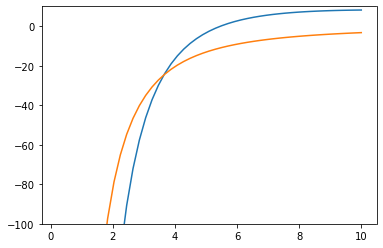

In [14]:
plot(theta*180/pi, E_NC);
plot(theta*180/pi, E_CFM);
ylim([-100, 10])